In [1]:
"""use this notebook to do a comparison between two scans and build metrics for anomaly detection"""
import matplotlib.pyplot as plt
from skimage import io
import argparse
import imutils
import cv2
import os
from skimage.metrics import structural_similarity
import numpy as np
plt.rcParams["figure.figsize"] = (20,20)
#%matplotlib notebook
import numpy as np
from scipy.signal import find_peaks
import pandas as pd

image_directory = 'C:/Users/Administrator/Desktop/thread_geometry/images/'
directory_save = 'C:/Users/Administrator/Desktop/thread_geometry/save/'


thread_fast.jpg (4058, 19178, 3)


<Figure size 1800x2880 with 0 Axes>

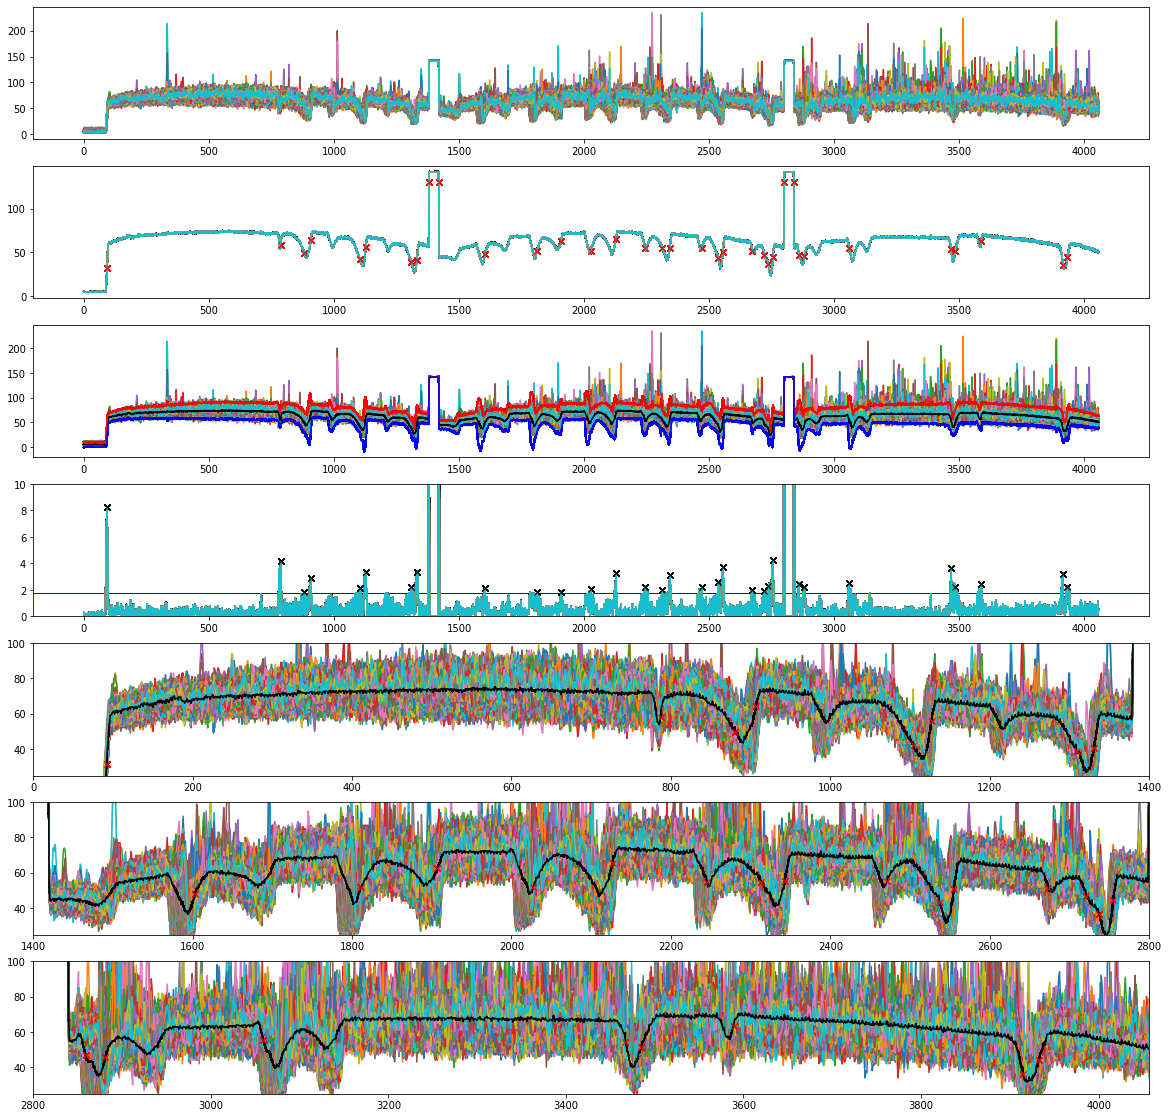

number of peaks 35
thread_slow.jpg (4058, 19240, 3)


<Figure size 1800x2880 with 0 Axes>

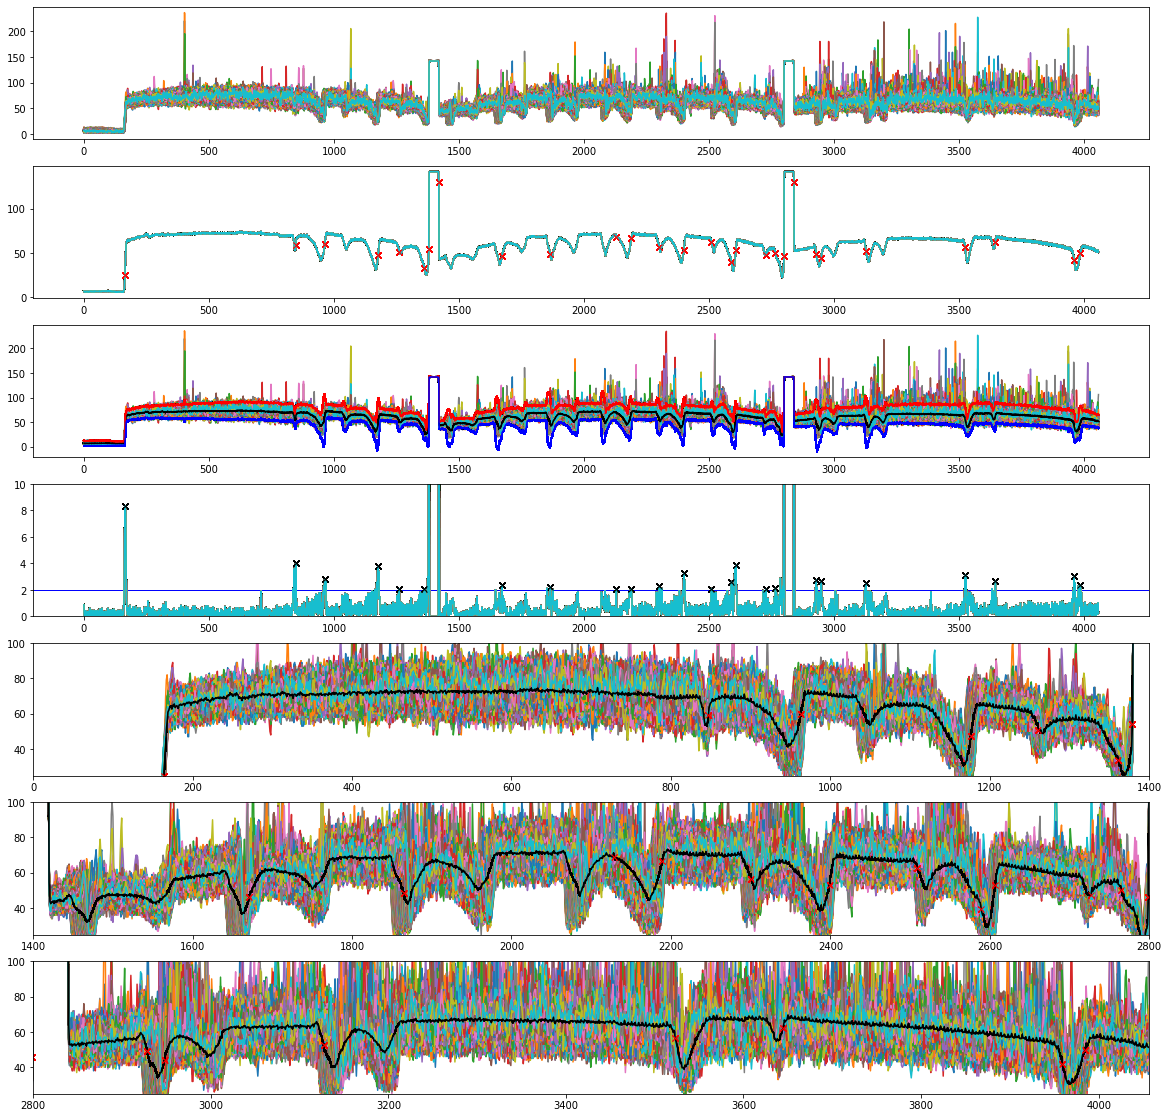

number of peaks 28


In [2]:
# objective 1 - Count number of threads from avg profile

for filename in os.listdir(image_directory):
    
    ob = io.imread(image_directory+filename,plugin='matplotlib')
    print(filename,ob.shape)    
    obj_grey = cv2.cvtColor(ob, cv2.COLOR_BGR2GRAY)
    
    plt.figure(figsize=(25,40))
    fig, (ax1, ax2, ax3,ax4,ax5,ax6,ax7) = plt.subplots(nrows=7)
        
    y_avg = np.mean(obj_grey[:,0:2000],axis=1)
    y_std = np.std(obj_grey[:,0:2000],axis=1)    
    y_avg_grad = np.abs(np.gradient(y_avg))
    
    std_factor = 1.0 #0.67
    x = y_avg_grad
    height = std_factor*np.std(x); # 2.1 works well, using larger value to get rid of noise
    distance = 15
    prominence = 1
        
    peaks, _ = find_peaks(x=np.abs(x), height=height, distance=distance, prominence=prominence)
    
    for i in range(0,2000):
        
        y = obj_grey[:,i]
        
        ax1.plot(y)
        
        ax2.plot(y_avg)
                
        ax3.plot(y)
        ax3.plot(y_avg,color="black")
        
        # add bounds to profile
        std_factor_b = 3
        ax3.plot(y_avg+std_factor_b*y_std,color="red")
        ax3.plot(y_avg-std_factor_b*y_std,color="blue")
        
        ax4.plot(y_avg_grad)

        ax4.set_ylim([0,10])
        
        ax4.axhline(y=height,c="blue",linewidth=0.5,zorder=0)
        ax4.plot(peaks,y_avg_grad[peaks], "x", color='black')
        
        # look at convolution of pattern
        
        ax5.plot(obj_grey[:,i])
        ax5.plot(y_avg,color="black")
        ax5.set_xlim([0,1400])
        ax5.set_ylim([25,100])
        
        ax6.plot(obj_grey[:,i])
        ax6.plot(y_avg,color="black")
        ax6.set_xlim([1400,2800])
        ax6.set_ylim([25,100])
        
        ax7.plot(obj_grey[:,i])
        ax7.plot(y_avg,color="black")
        ax7.set_xlim([2800,4057])
        ax7.set_ylim([25,100])
        
        ax2.plot(peaks,y_avg[peaks], "x", color='red')
        ax5.plot(peaks,y_avg[peaks], "x", color='red')
        ax6.plot(peaks,y_avg[peaks], "x", color='red')
        ax7.plot(peaks,y_avg[peaks], "x", color='red')

    plt.show()
    print('number of peaks', len(peaks))
        

thread_fast.jpg (4058, 19178, 3)
(4058, 19178)
(19178,)
19178
windows,  38.356
n,  500
w,  38


<Figure size 720x2880 with 0 Axes>

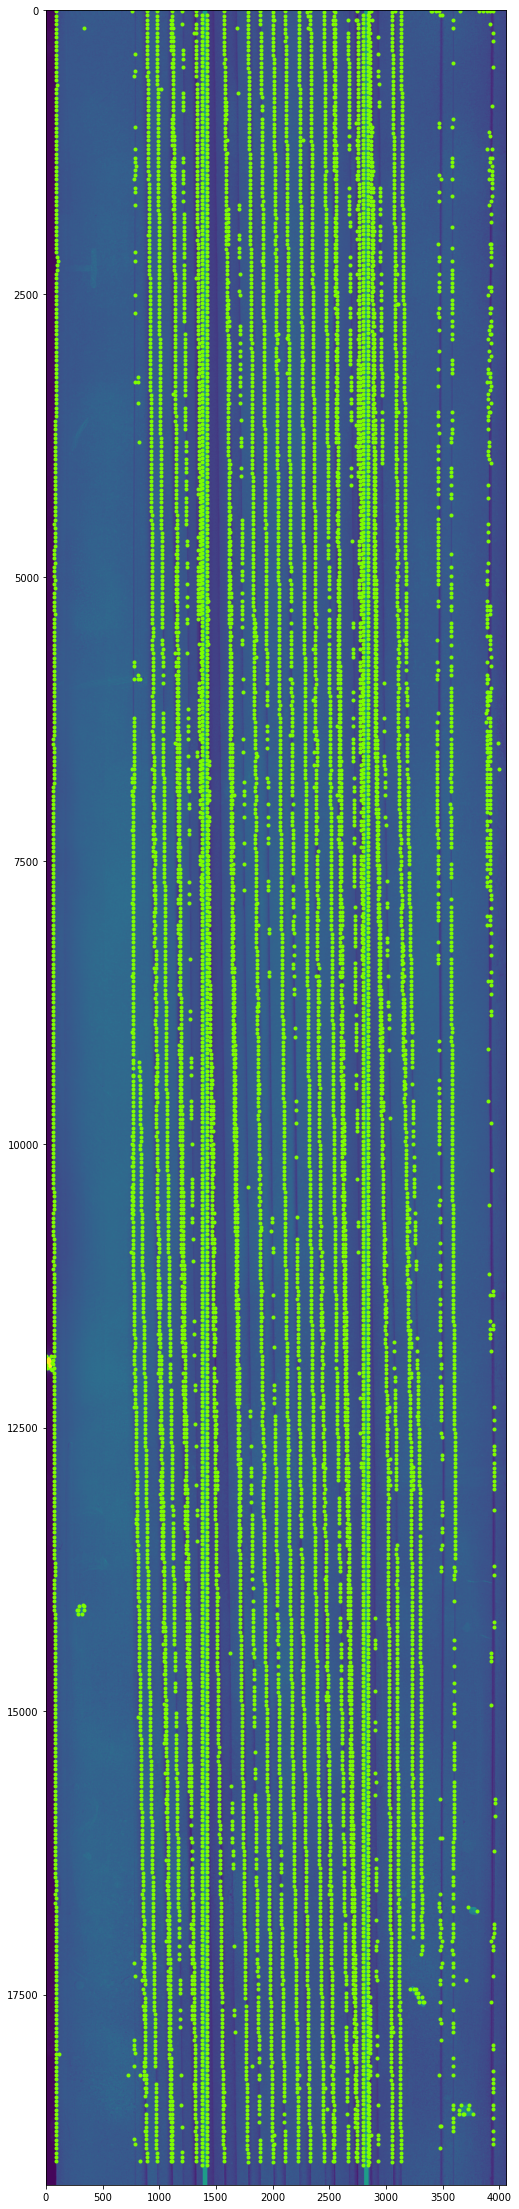

      x          y
0    92   8.631579
1   760   5.539474
2   894   6.197368
3   977   6.421053
4  1115   6.894737
5  1201   6.460526
6  1323   7.065789
7  1380  37.131579
8  1419  42.644737
9  1570   7.013158


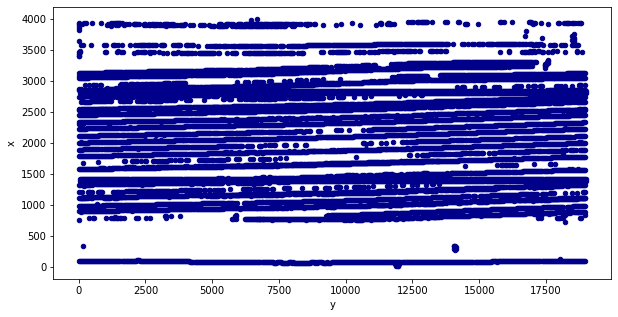

thread_slow.jpg (4058, 19240, 3)
(4058, 19240)
(19240,)
19240
windows,  38.48
n,  500
w,  38


<Figure size 720x360 with 0 Axes>

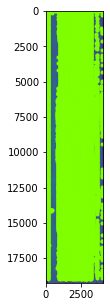

      x          y
0   167   9.407895
1   682   8.855263
2   738   6.171053
3   785   7.513158
4  1033   7.000000
5  1156   5.828947
6  1168   7.092105
7  1380  37.118421
8  1419  43.986842
9  1446   6.144737


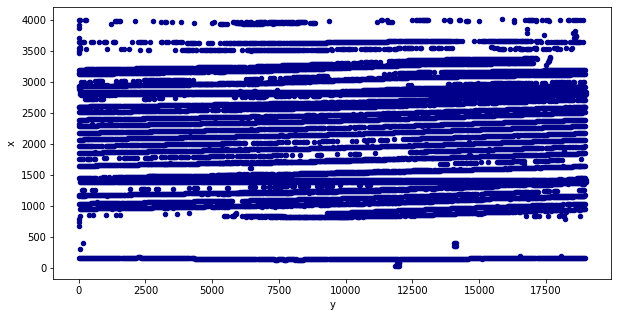

In [19]:
# windowed method
plt.rcParams["figure.figsize"] = (10,40)
from scipy import ndimage

for filename in os.listdir(image_directory):
    
    ob = io.imread(image_directory+filename,plugin='matplotlib')
    print(filename,ob.shape)    
    g = cv2.cvtColor(ob, cv2.COLOR_BGR2GRAY)
    print(np.shape(g))
    print(np.shape(g[0]))
    print(len(g[0]))
    
    n = 500

    print('windows, ',len(g[0])/n)
    print('n, ', n)
    
    w = int(len(g[0])/n)
    
    print('w, ', w)
    
    splice_factor = w #10 was good

    plt.figure()
    fig, ax = plt.subplots()
    
    # collect detected values as dict
    
    lines_dict = {"x":[],"y":[]}
    
    for i in range(0,n):
        start = int(i*w)
        stop = int((i+1)*w)
        #if stop > len(g[0]):
        #    break
        #    
        y_avg = np.mean(g[:,start:stop],axis=1)
        
        y_std = np.std(g[:,start:stop],axis=1)    
        y_avg_grad = np.abs(np.gradient(y_avg))

        std_factor = 2.50 #1.0 #0.67
        x = y_avg_grad
        height = std_factor*np.std(np.abs(x)); # 2.1 works well, using larger value to get rid of noise
        distance = 10
        prominence = 1

        peaks, _ = find_peaks(x=np.abs(x), height=height, distance=distance, prominence=prominence)
        
        # add peaks to dict
        
        for pk in peaks:
            
            lines_dict["x"].append(pk)
            lines_dict["y"].append(x[pk] + splice_factor*i)
            
        ax.plot(peaks, x[peaks]+ splice_factor*i, ".", color='chartreuse')
        
    # flip image
    
    g = np.fliplr(g)
    
    # rotate to align with values
        
    r_g = ndimage.rotate(g, 90)
    plt.imshow(r_g)
            
    plt.show()
    
    # show dataframe 
    
    plt.rcParams["figure.figsize"] = (10,5)

    
    df = pd.DataFrame.from_dict(lines_dict)
    result = df.head(10)
    print(result)
    
    # look at values from dict
    
    #fig, ax = plt.subplots()
    
    ax = df.plot.scatter(x='y', y='x', c='DarkBlue')
    
    plt.show()
    
    os.makedirs(directory_save + '/thread_geometry', exist_ok=True)  
    df.to_csv(directory_save + '/thread_geometry/' + filename + 'out.csv') 




thread_fast.jpg (4058, 19178, 3)


<Figure size 1800x5760 with 0 Axes>

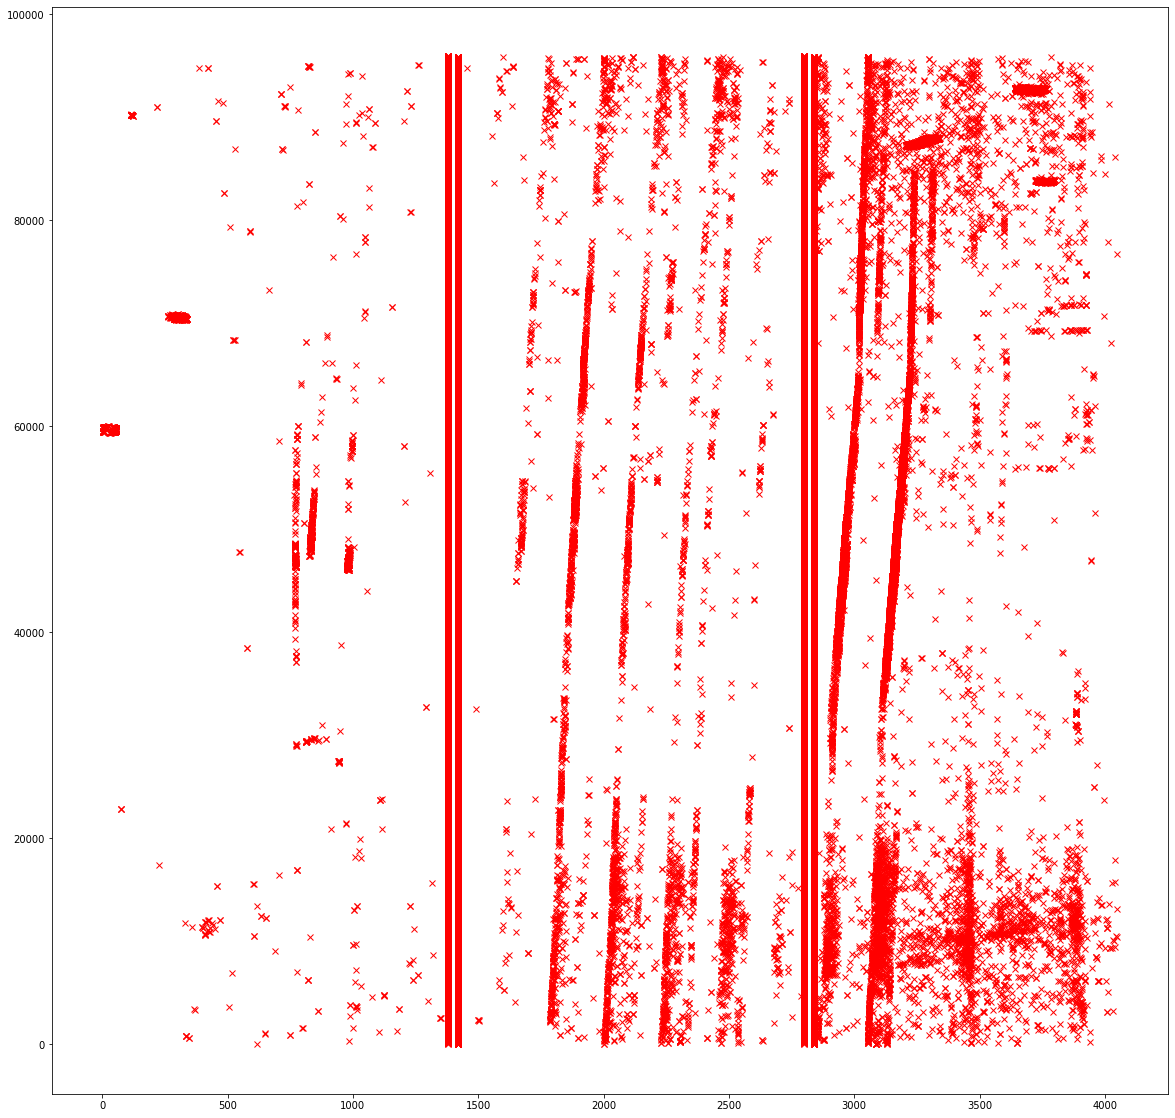

thread_slow.jpg (4058, 19240, 3)


<Figure size 1800x5760 with 0 Axes>

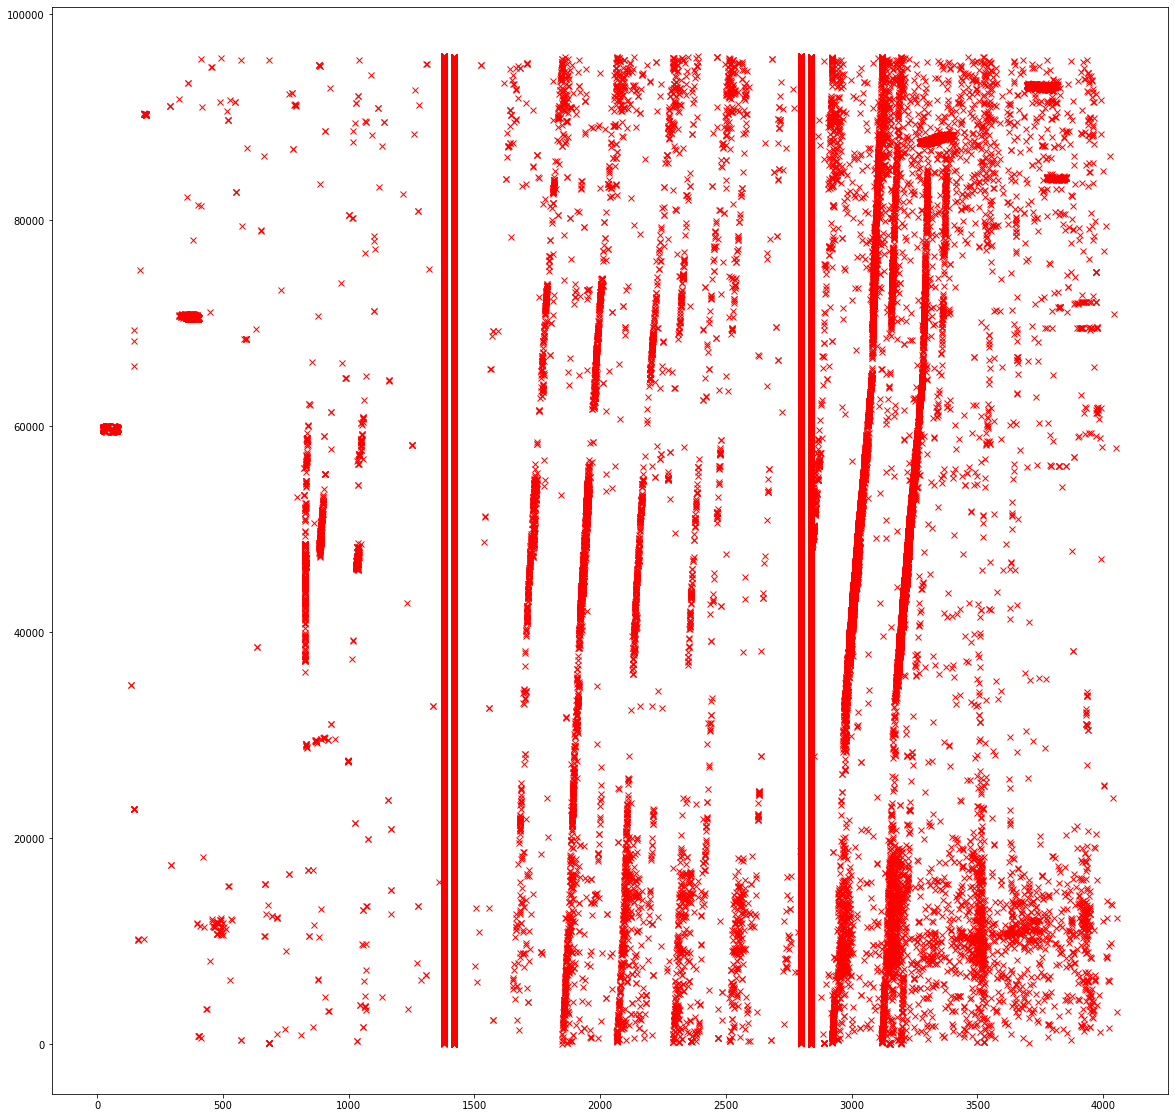

In [3]:
for filename in os.listdir(image_directory):
    """
    Just looks for peaks 
    """
    ob = io.imread(image_directory+filename,plugin='matplotlib')
    print(filename,ob.shape)    
    obj_grey = cv2.cvtColor(ob, cv2.COLOR_BGR2GRAY)
    splice_factor = 5
    
    plt.figure(figsize=(25,80))
    fig, ax = plt.subplots()
    for i in range(0,19178-1):

        y = obj_grey[:,i]

        grad = np.gradient(y)

        # find peaks
        std_factor = 4.5
        x = grad
        height = std_factor*np.std(x); # 2.1 works well, using larger value to get rid of noise
        distance = 5
        prominence = 2

        peaks, _ = find_peaks(x=np.abs(x), height=height, distance=distance, prominence=prominence)

        ax.plot(peaks,grad[peaks] + splice_factor*i, "x",c="red")

    plt.show()

thread_fast.jpg (4058, 19178, 3)


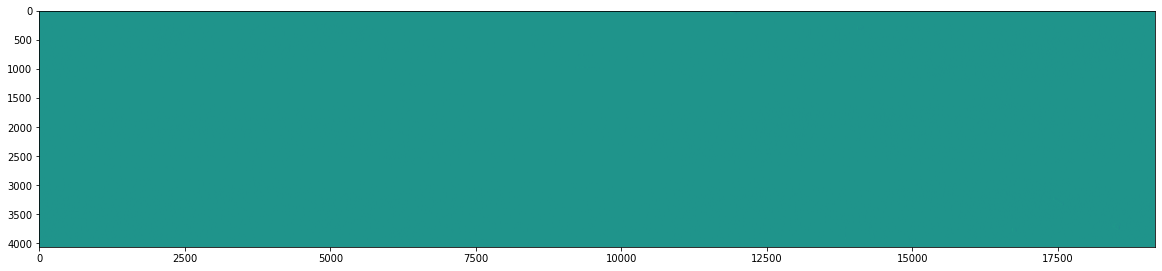

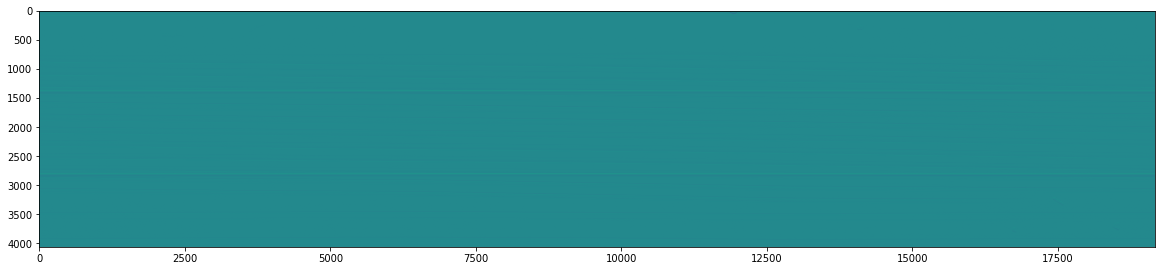

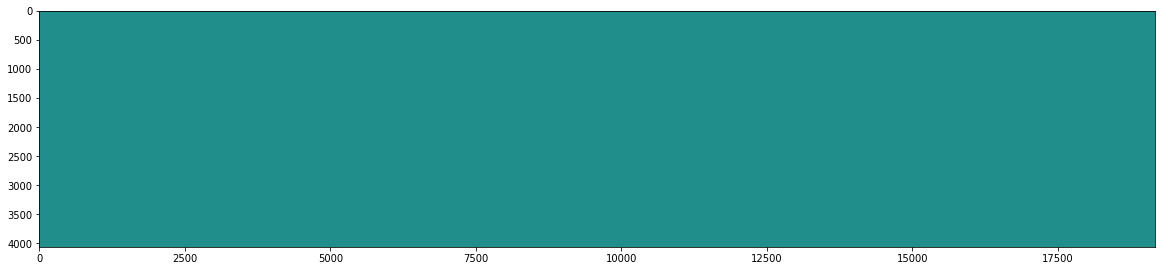

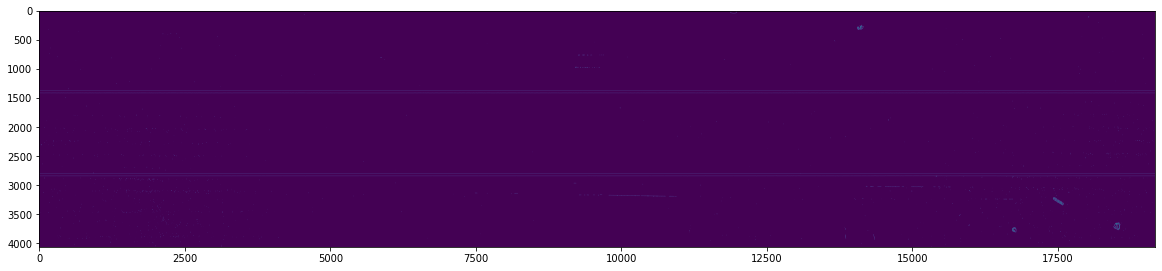

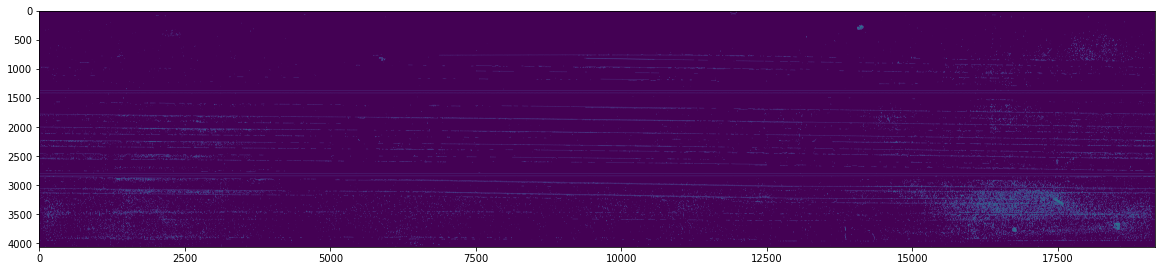

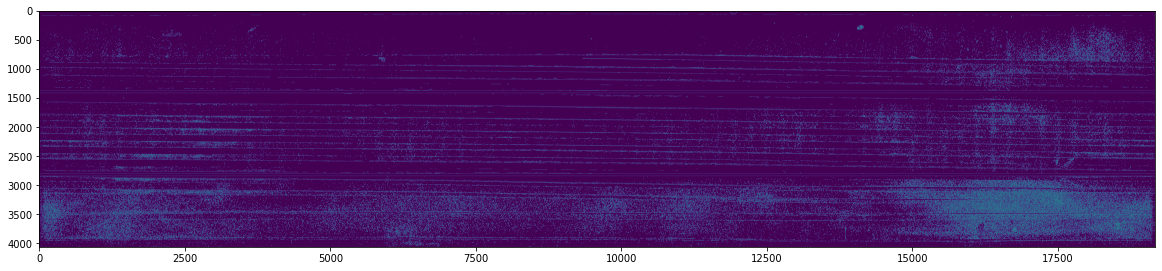

thread_slow.jpg (4058, 19240, 3)


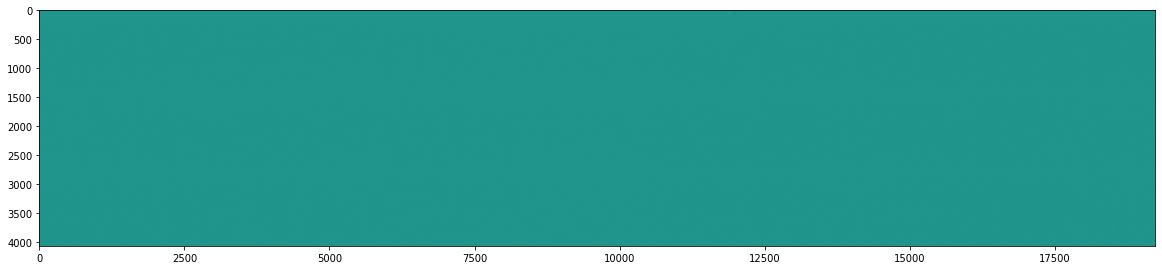

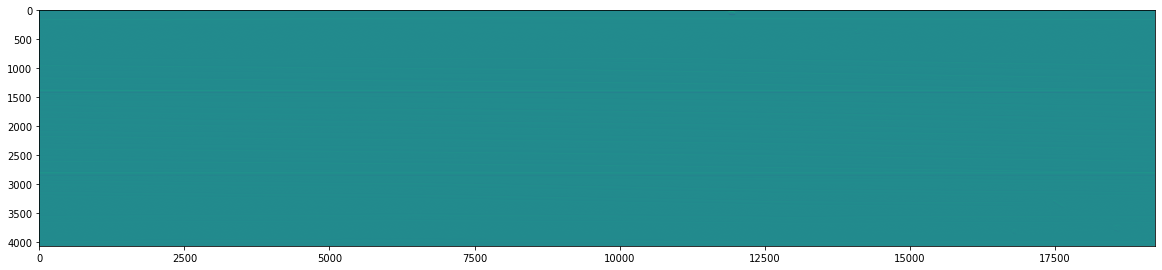

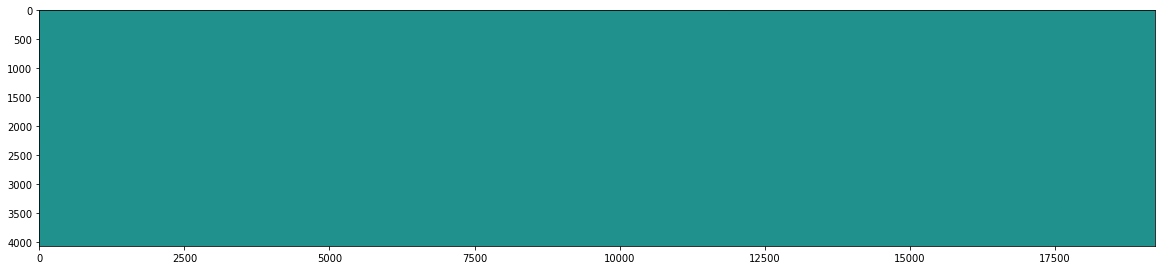

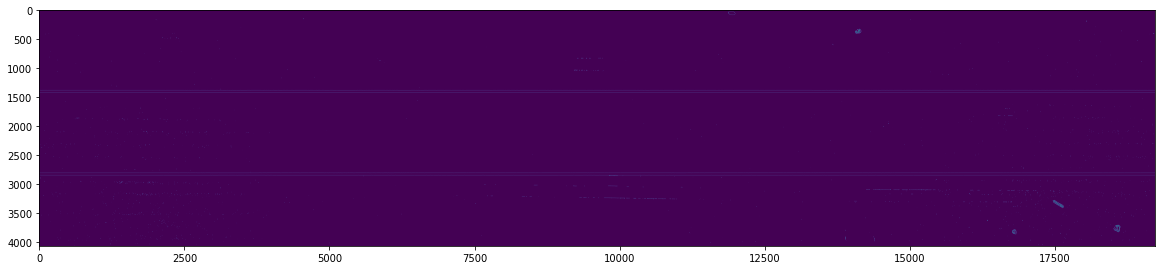

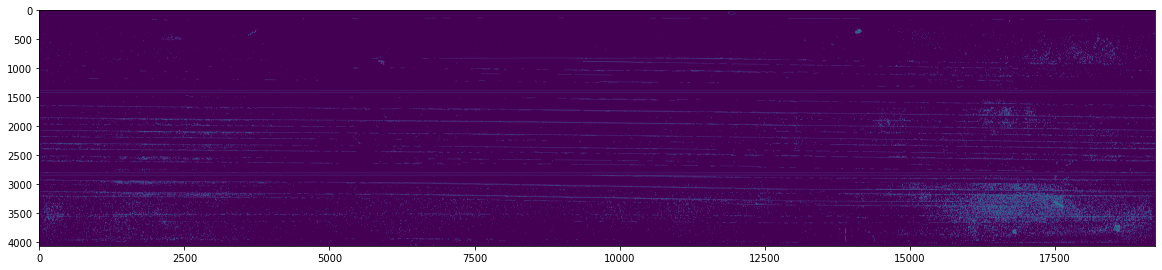

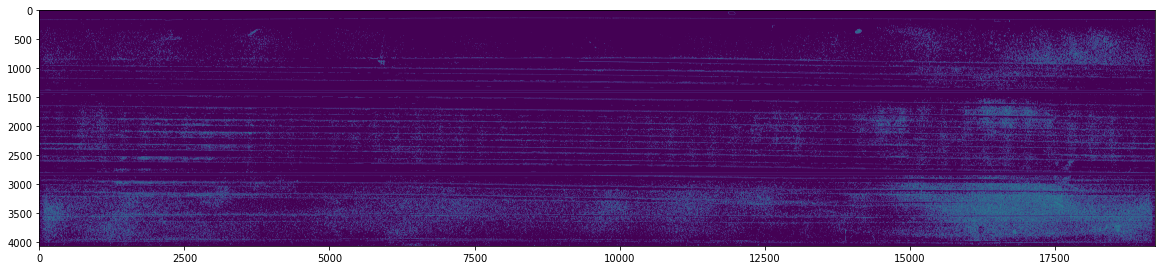

In [4]:
# how does Cv2 sobel method compare?

for filename in os.listdir(image_directory):
    
    ob = io.imread(image_directory+filename,plugin='matplotlib')
    print(filename,ob.shape)
    #i = cv2.imread(filename)
    g = cv2.cvtColor(ob, cv2.COLOR_BGR2GRAY)
    
    sobelx = cv2.Sobel(src=g, ddepth=cv2.CV_64F, dx=1, dy=0,ksize=3)
    sobely = cv2.Sobel(src=g, ddepth=cv2.CV_64F, dx=0, dy=1,ksize=3)
    sobelxy = cv2.Sobel(src=g, ddepth=cv2.CV_64F, dx=1, dy=1,ksize=3)
   
    plt.imshow(sobelx)
    plt.show()
    plt.imshow(sobely)
    plt.show()
    plt.imshow(sobelxy)
    plt.show()
    
    canny1 = cv2.Canny(image=g, threshold1=100, threshold2=200)
    canny2 = cv2.Canny(image=g, threshold1=50, threshold2=120)
    canny3 = cv2.Canny(image=g, threshold1=40, threshold2=90)
    
    plt.imshow(canny1)
    plt.show()
    plt.imshow(canny2)
    plt.show()
    plt.imshow(canny3)
    plt.show()
    

thread_fast.jpg (4058, 19178, 3)


<Figure size 1800x5760 with 0 Axes>

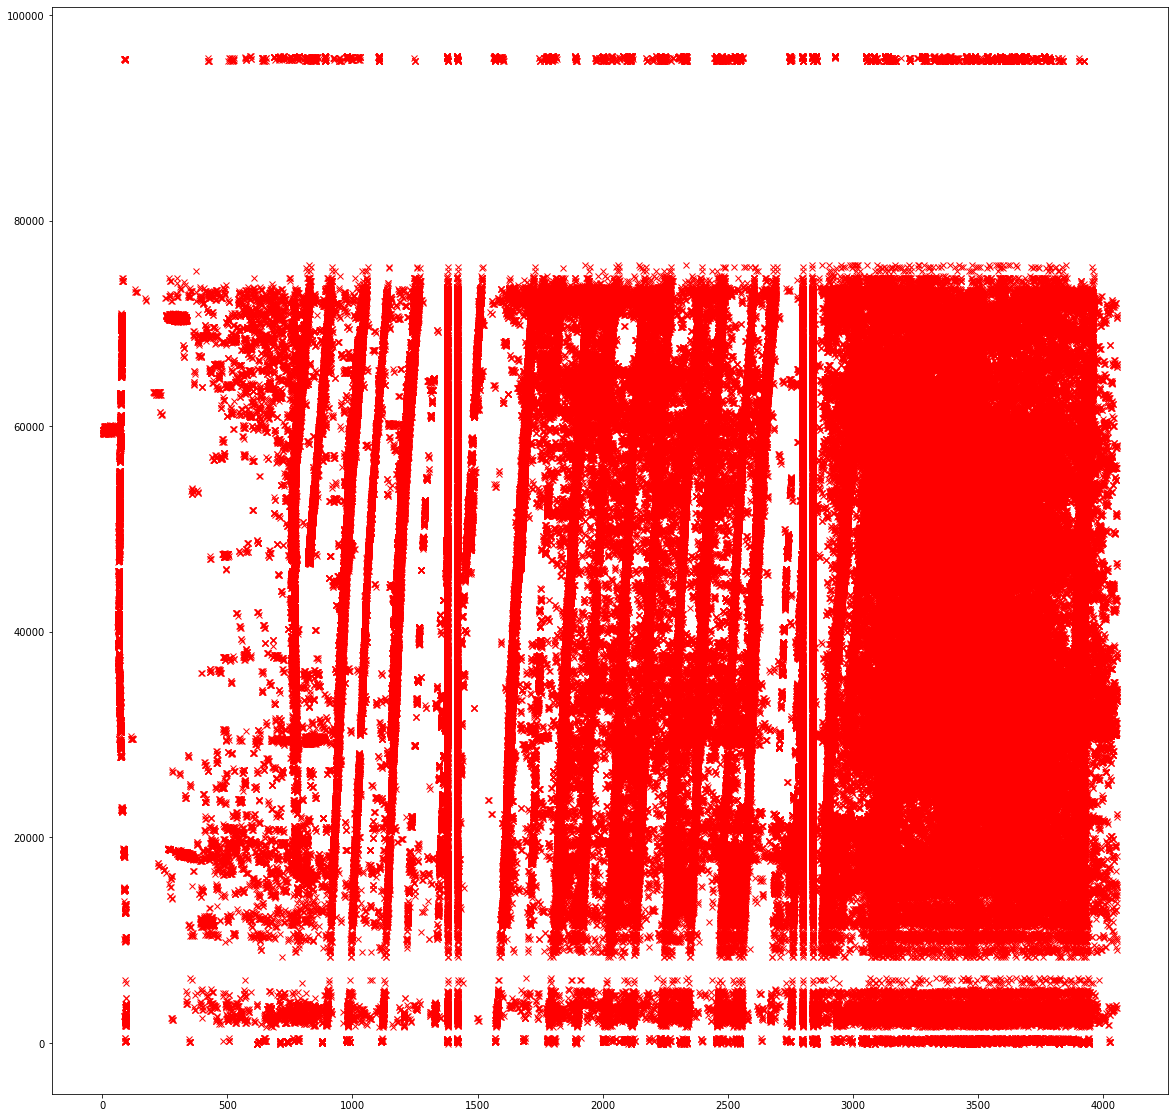

thread_slow.jpg (4058, 19240, 3)


<Figure size 1800x5760 with 0 Axes>

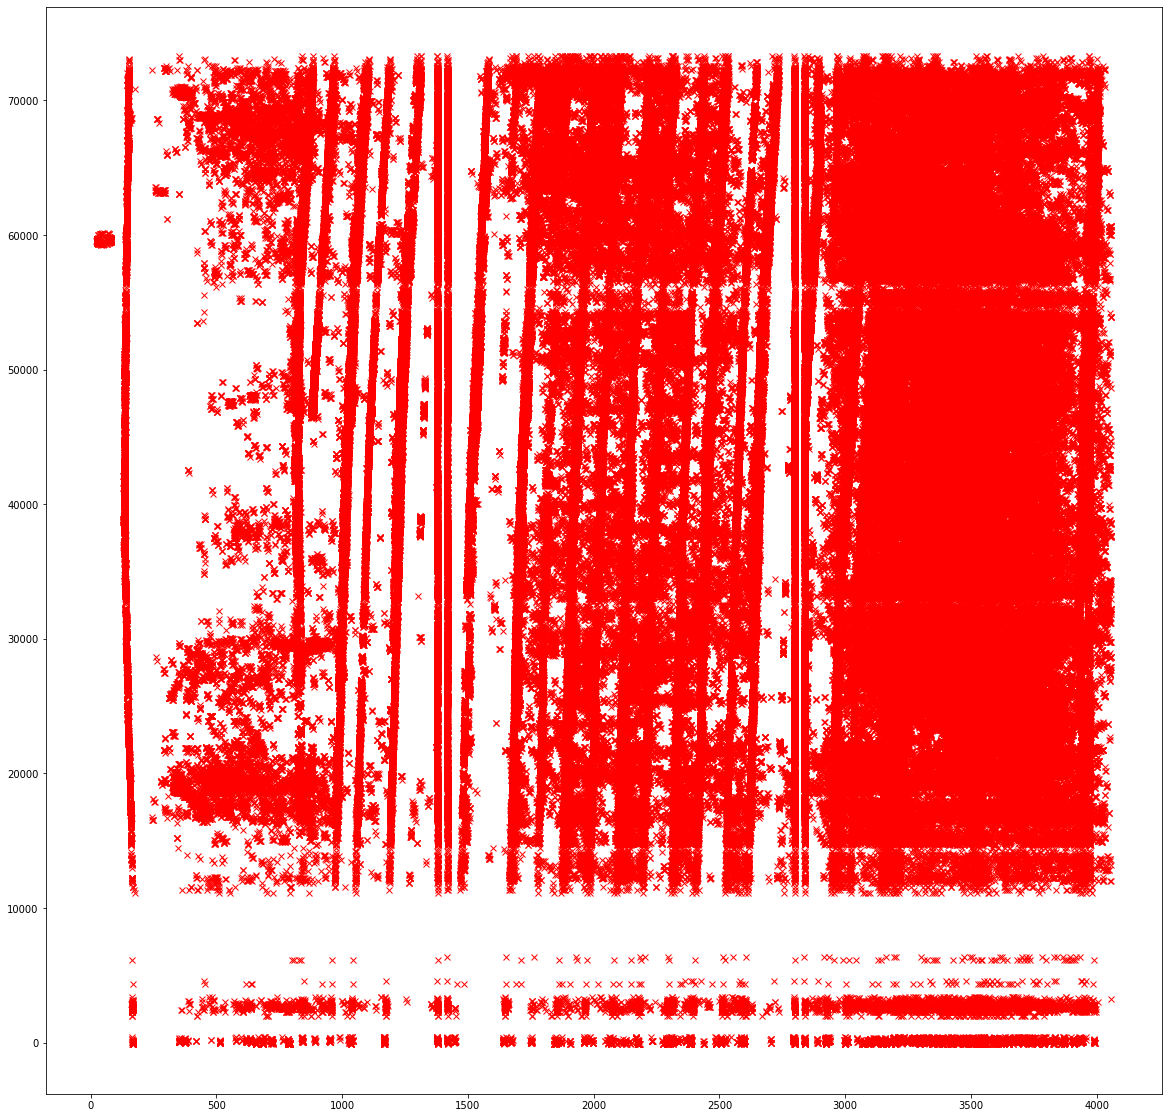

In [5]:
# use canny edge detector to filter image, then run peak detect
for filename in os.listdir(image_directory):
    splice_factor = 5
    ob = io.imread(image_directory+filename,plugin='matplotlib')
    print(filename,ob.shape)    
    g = cv2.cvtColor(ob, cv2.COLOR_BGR2GRAY)
    
    obj_grey = cv2.Canny(image=g, threshold1=40, threshold2=90)

   
    plt.figure(figsize=(25,80))
    fig, ax = plt.subplots()
    for i in range(0,19178-1):

        y = obj_grey[:,i]

        grad = np.gradient(y)

        # find peaks
        std_factor = 4
        x = grad
        height = std_factor*np.std(x); # 2.1 works well, using larger value to get rid of noise
        distance = 5
        prominence = 2

        peaks, _ = find_peaks(x=np.abs(x), height=height, distance=distance, prominence=prominence)

        ax.plot(peaks,grad[peaks] + splice_factor*i, "x",c="red")

    plt.show()



thread_fast.jpg (4058, 19178, 3)


<Figure size 1800x2880 with 0 Axes>

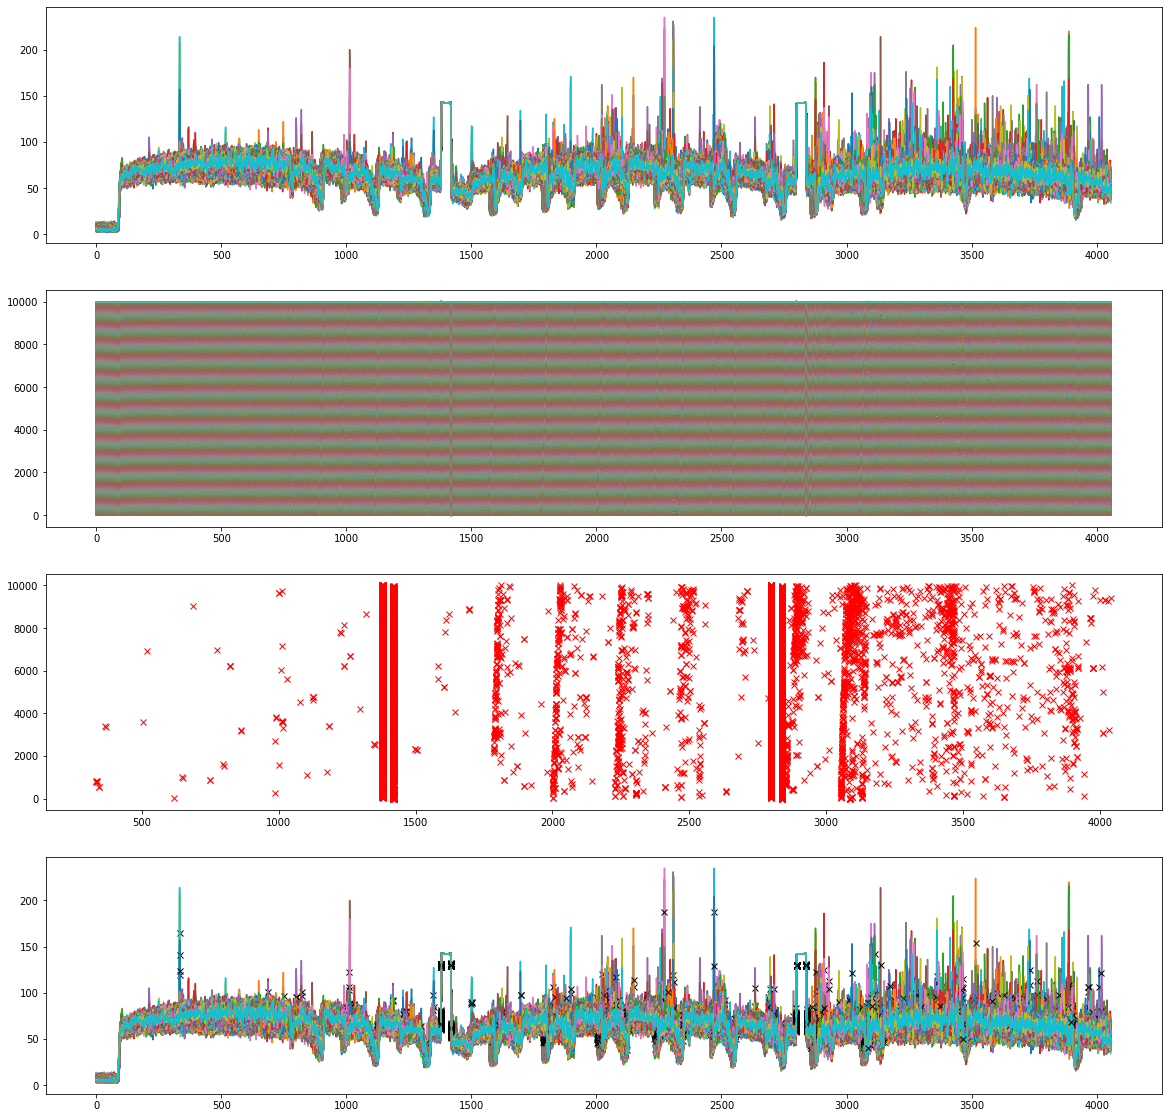

<Figure size 1800x5760 with 0 Axes>

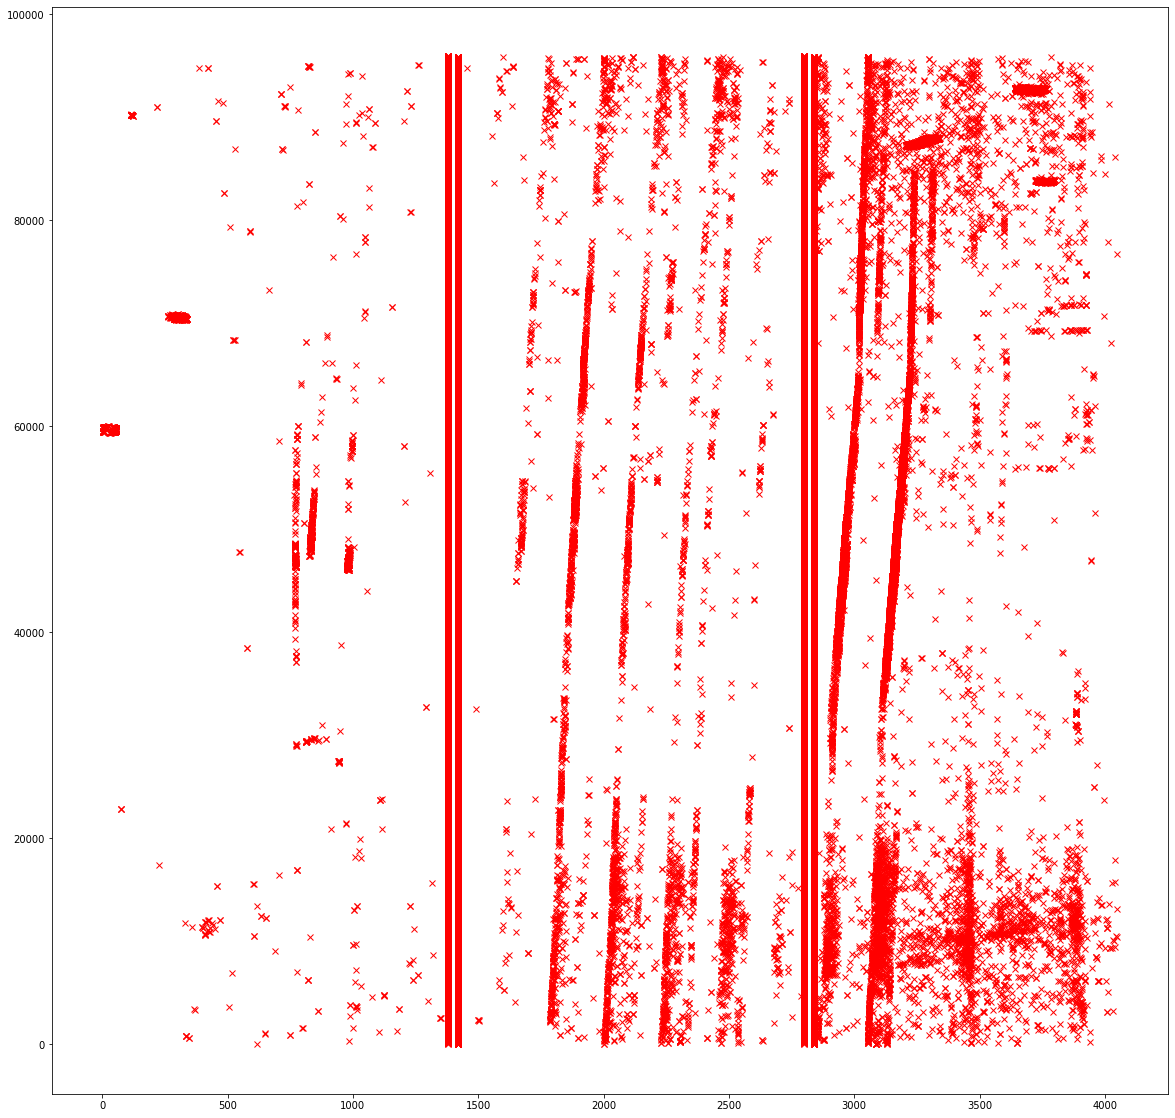

thread_slow.jpg (4058, 19240, 3)


<Figure size 1800x2880 with 0 Axes>

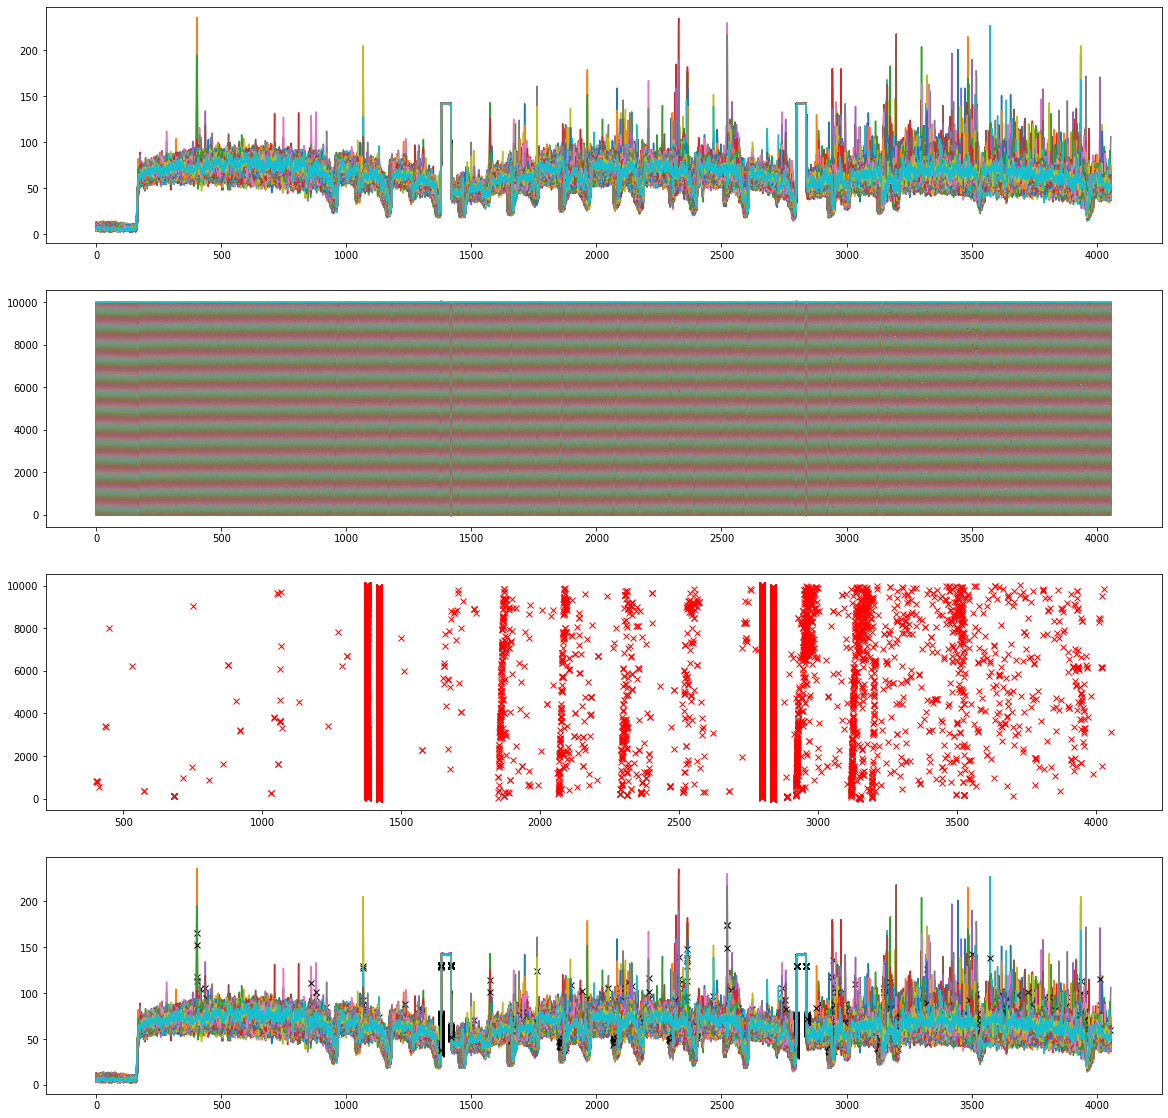

KeyboardInterrupt: 

<Figure size 1800x5760 with 0 Axes>

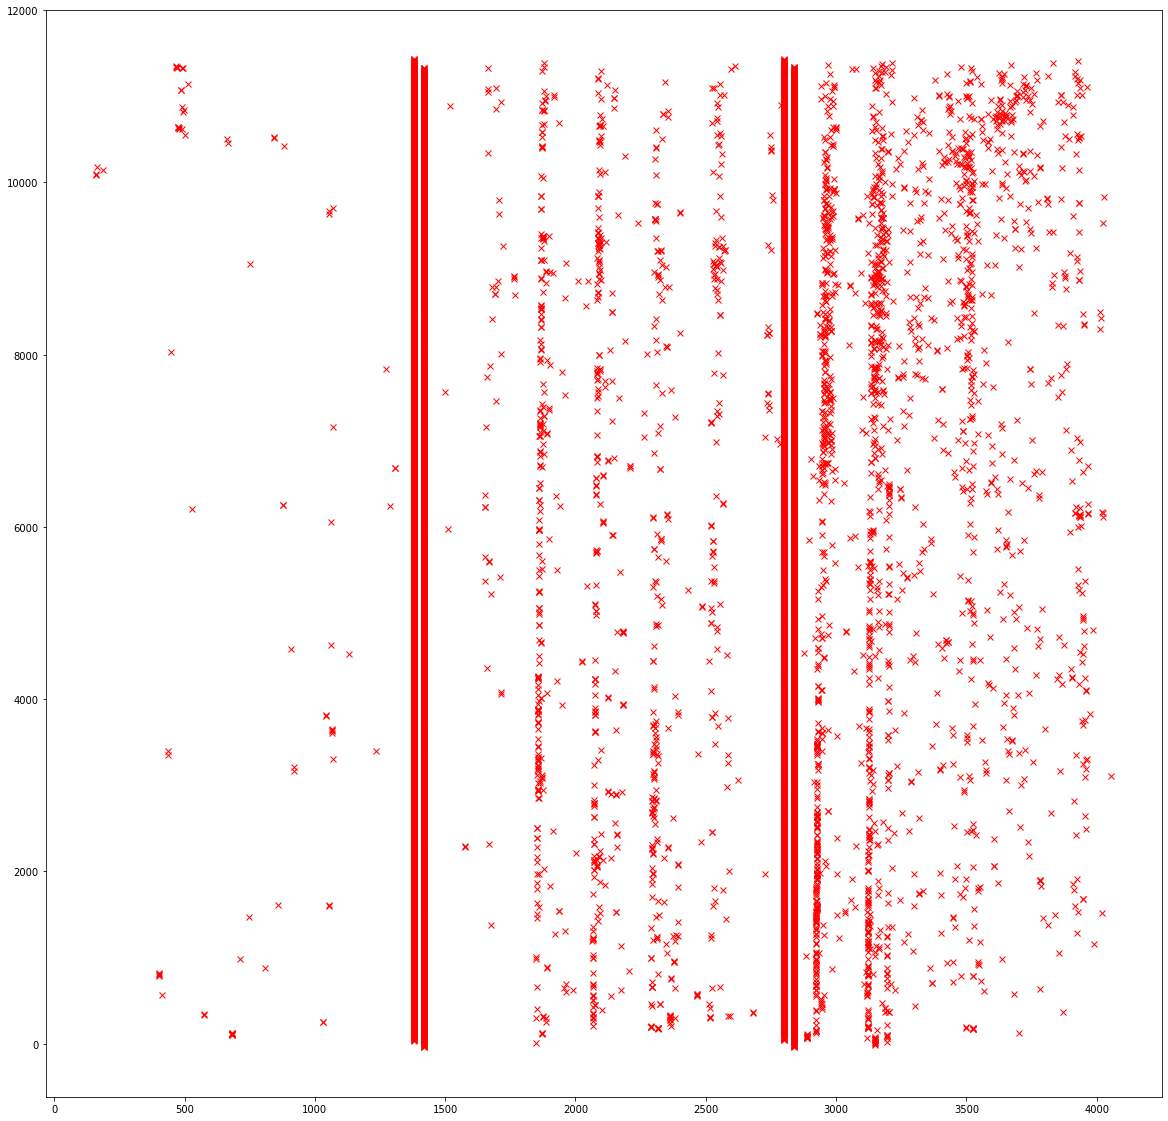

In [6]:

for filename in os.listdir(image_directory):
    
    ob = io.imread(image_directory+filename,plugin='matplotlib')
    print(filename,ob.shape)    
    obj_grey = cv2.cvtColor(ob, cv2.COLOR_BGR2GRAY)
    
    # look at stick profile
    
    n = 500
    
    splice_factor = 10
    std_factor = 4.5
    
    # Show gradient
    
    plt.figure(figsize=(25,40))
    fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=4)
    
    splice_factor = 5
    
    for i in range(0,2000):
        
        y = obj_grey[:,i]
        
        grad = np.gradient(y)
                
        # find peaks
        
        x = grad
        height = std_factor*np.std(x); # 2.1 works well, using larger value to get rid of noise
        distance = 5
        prominence = 2
        
        peaks, _ = find_peaks(x=np.abs(x), height=height, distance=distance, prominence=prominence)
        
        ax1.plot(y)
        ax2.plot(grad + splice_factor*i)
        ax3.plot(peaks,grad[peaks] + splice_factor*i, "x",c="red")
        
        ax4.plot(y)
        ax4.plot(peaks,y[peaks], "x", color='black')
        
        #ax.set_xlim([0,1500])
    plt.show()
    
    plt.figure(figsize=(25,80))
    fig, ax = plt.subplots()
    for i in range(0,19178-1):
        
        y = obj_grey[:,i]
        
        grad = np.gradient(y)
                
        # find peaks
        
        x = grad
        height = std_factor*np.std(x); # 2.1 works well, using larger value to get rid of noise
        distance = 5
        prominence = 2
        
        peaks, _ = find_peaks(x=np.abs(x), height=height, distance=distance, prominence=prominence)
        
        ax.plot(peaks,grad[peaks] + splice_factor*i, "x",c="red")
        
    plt.show()
        

In [ ]:
# create spacetime plot for first 50 sticks


for filename in os.listdir(image_directory):
    
    ob = io.imread(image_directory+filename,plugin='matplotlib')
    print(filename,ob.shape)
    obj_grey = cv2.cvtColor(ob, cv2.COLOR_BGR2GRAY)
    
    name = filename.split('.')
    # look at profile
    #n = 500
    n = 1000
    
    #plt.imshow(ob[:,n])
    #plt.show()
    
    plt.figure(figsize=(25,40))
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
    
    splice_factor = 10
    
    obj_grey_avg = np.mean(obj_grey[:,0:n-1],axis=1)
    obj_grey_var = np.var(obj_grey[:,0:n-1],axis=1)
    
    


    for i in range(0,n):
        
        grad = np.gradient(obj_grey[:,i])
        
        ax1.plot(obj_grey[:,i])
        
        ax2.plot(obj_grey_avg)
        
        ax3.plot(obj_grey[:,i]+ splice_factor*i)
        
        ax4.plot(grad)
        
        ax5.plot(grad+ splice_factor*i)
    plt.savefig(directory_save + '/ ' + '_' + name[0] + ' _line_plot.pdf')  

    plt.show()
    #plt.savefig(directory_save+ '/line_plot.pdf')  



In [ ]:
# look at images in folder
#

for filename in os.listdir(image_directory):
    
    ob = io.imread(image_directory+filename,plugin='matplotlib')
    plt.figure(figsize=(20,10))
    print(filename,ob.shape)
    plt.imshow(ob)
    plt.show()
    
    # look at greyscale
    
    obj_grey = cv2.cvtColor(ob, cv2.COLOR_BGR2GRAY)
    plt.figure(figsize=(20,10))
    plt.imshow(obj_grey)
    plt.show()
    
    # look at profile
    
    print(np.shape(obj_grey))
    print(np.shape(obj_grey[0]))
    print(np.shape(obj_grey[0][0]))

    
    plt.figure(figsize=(25,20))
    
    fig, (ax1, ax2,ax3) = plt.subplots(nrows=3)
    
    for i in range(0,50):
        ax1.plot(obj_grey[1300:3000,i])
        
    for j in range(500,600):
        ax2.plot(obj_grey[1300:3000,j])
    for k in range(1000,1060):
        ax3.plot(obj_grey[1300:3000,k])
    
    plt.show()

    
    
    

In [ ]:
## old stuff below.

In [ ]:
# make routine that crops out black border

def crop_black_border(imread_img):
    
    """use this to return an image object with the black border cropped"""
    gray = cv2.cvtColor(imread_img, cv2.COLOR_BGR2GRAY)

    w = gray.shape[1]
    h = gray.shape[0]
    
    cut = 0
    
    for j in range(h):
        # 7 too big for nose scan
        if gray[0][j] < 7:
            cut +=1
        else:
            break
                
    crop = imread_img[cut:h, 0:w]
    
    crop_g = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    
    return crop_g

In [ ]:
# check to see if cropping works
states = ['thread']

for state in states:
    
    slow_scan = cv2.imread('C:/Users/Administrator/Desktop/scanning_metrics/'+ state + '_slow.jpg')
    fast_scan = cv2.imread('C:/Users/Administrator/Desktop/scanning_metrics/' + state + '_fast.jpg')
    
    print(slow_scan.shape, fast_scan.shape)
    
    # crop black out of images
    
    slow_scan_c = crop_black_border(slow_scan)
    fast_scan_c = crop_black_border(fast_scan)
    
    print(slow_scan_c.shape, fast_scan_c.shape)

    
    slow_scan_c = cv2.resize(slow_scan_c, (fast_scan_c.shape[1],fast_scan_c.shape[0]))
    
    print(slow_scan_c.shape, fast_scan_c.shape)

    (score, diff) = structural_similarity(fast_scan_c, slow_scan_c, full=True)
    diff = (diff * 255).astype("uint8")
    
    print('score, ', score)
    
    plt.figure(figsize=[20,10])
    
    plt.subplot(511); plt.axis('off'); plt.imshow(slow_scan); plt.title("slow scan");
    plt.subplot(512); plt.axis('off'); plt.imshow(fast_scan); plt.title("fast scan");
    plt.subplot(513); plt.axis('off'); plt.imshow(slow_scan_c); plt.title("slow scan cropped");
    plt.subplot(514); plt.axis('off'); plt.imshow(fast_scan_c); plt.title("fast scan cropped");
    plt.subplot(515); plt.axis('off'); plt.imshow(diff); plt.title("fast scan cropped");
    
     # Threshold the difference image, followed by finding contours to
    # obtain the regions of the two input images that differ
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    mask = np.zeros(slow_scan.shape, dtype='uint8')
    filled_after = fast_scan.copy()

    for c in contours:
        area = cv2.contourArea(c)
        if area > 40:
            x,y,w,h = cv2.boundingRect(c)
            cv2.rectangle(slow_scan, (x, y), (x + w, y + h), (36,255,12), 2)
            cv2.rectangle(fast_scan, (x, y), (x + w, y + h), (36,255,12), 2)
            cv2.drawContours(mask, [c], 0, (0,255,0), -1)
            cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)
            
    
    #write results to file

    cv2.imwrite(directory + state + '_diff.jpg',diff)
    cv2.imwrite(directory + state + '_mask.jpg',mask)
    cv2.imwrite(directory + state + '_filled_after.jpg',filled_after)


In [ ]:
# try image alignment by ID'ing key features
## try to align both images
states = ['thread']
# states = ['non-thread']
# states = ['thread', 'non-thread']

for state in states:
    
    slow_scan = cv2.imread('C:/Users/Administrator/Desktop/scanning_metrics/'+ state + '_slow.jpg')
    fast_scan = cv2.imread('C:/Users/Administrator/Desktop/scanning_metrics/' + state + '_fast.jpg')
    
    # crop top black line out of images
    
    slow_scan_gray = crop_black_border(slow_scan)
    fast_scan_gray = crop_black_border(fast_scan)

    # Convert images to grayscale
#     slow_scan_gray = cv2.cvtColor(slow_scan, cv2.COLOR_BGR2GRAY)
#     fast_scan_gray = cv2.cvtColor(fast_scan, cv2.COLOR_BGR2GRAY)
    
    # initiate orb
    orb = cv2.ORB_create(500)
    
    kp1, des1 = orb.detectAndCompute(slow_scan_gray, None)
    kp2, des2 = orb.detectAndCompute(fast_scan_gray, None)
    
    #display
    
    im1_display = cv2.drawKeypoints(slow_scan, kp1, outImage=np.array([]), color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
      
    im2_display = cv2.drawKeypoints(fast_scan, kp2, outImage=np.array([]), color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    plt.figure(figsize=[20,10])
    plt.subplot(211); plt.axis('off'); plt.imshow(slow_scan_gray); plt.title("slow scan");
    plt.subplot(212); plt.axis('off'); plt.imshow(fast_scan_gray); plt.title("fast scan");


In [ ]:
# use flags to align both images

#match features 
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(des1, des2, None)

#sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

#remove not so good matches
numGoodMatches = int(len(matches) *0.1)
matches = matches[:numGoodMatches]

# draw top matches

im_matches = cv2.drawMatches(slow_scan, kp1, fast_scan, kp2, matches, None)

plt.figure(figsize=[20,20])
plt.imshow(im_matches); plt.axis('off'); plt.title("Original Form");

In [ ]:
# find homography
points1 = np.zeros((len(matches),2), dtype=np.float32)
points2 = np.zeros((len(matches),2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i,:] = kp1[match.queryIdx].pt
    points2[i,:] = kp2[match.trainIdx].pt

# invoke homography to see if you can align images from desciptors
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

# warp image? lets see what this does...

height, width, channels = slow_scan.shape
# height, width, channels = fast_scan.shape

im2_reg = cv2.warpPerspective(fast_scan, h, (width, height))

im2_reg_g = cv2.cvtColor(im2_reg, cv2.COLOR_BGR2GRAY)
slow_scan_gray = cv2.cvtColor(slow_scan, cv2.COLOR_BGR2GRAY)
fast_scan_gray = cv2.cvtColor(fast_scan, cv2.COLOR_BGR2GRAY)

print('shape of im2_reg_g', im2_reg_g.shape)
print('shape of slow_scan_gray', slow_scan_gray.shape)
print('shape of fast_scan_gray', fast_scan_gray.shape)

# resize slow to fast

slow_scan_gray = cv2.resize(slow_scan_gray, (fast_scan_gray.shape[1],fast_scan_gray.shape[0]))
print('resized slow scan gray', slow_scan_gray.shape)


(score, diff) = structural_similarity(fast_scan_gray, slow_scan_gray, full=True)
diff = (diff * 255).astype("uint8")
print('initial ssmi', score)

# display results

plt.figure(figsize=[20,10]);
plt.subplot(411);plt.imshow(slow_scan); plt.axis('off'); plt.title("Original Form");
plt.subplot(412);plt.imshow(im2_reg); plt.axis('off'); plt.title("warped perspective Form");
plt.subplot(413);plt.imshow(diff); plt.axis('off'); plt.title("diff from both");

# do diff with augmented form

im2_reg_g = cv2.resize(im2_reg_g, (fast_scan_gray.shape[1],fast_scan_gray.shape[0]))

(score2, diff2) = structural_similarity(im2_reg_g, fast_scan_gray, full=True)
diff2 = (diff2 * 255).astype("uint8")
print('warped ssmi', score)

plt.subplot(414);plt.imshow(diff2); plt.axis('off'); plt.title("diff with warped");

cv2.imwrite(directory + state + '_diff.jpg',diff)
cv2.imwrite(directory + state + '_diff_warped.jpg',diff2)

In [ ]:
# our second image alignment visualization will be *overlaying* the
# aligned image on the template, that way we can obtain an idea of
# how good our image alignment is
overlay = template.copy()
output = aligned.copy()
cv2.addWeighted(overlay, 0.5, output, 0.5, 0, output)

# show the two output image alignment visualizations
cv2.imshow("Image Alignment Stacked", stacked)
cv2.imshow("Image Alignment Overlay", output)
cv2.waitKey(0)

In [ ]:
# import numpy as np
# import scipy.signal

# def cross_image(im1, im2):
#    # get rid of the color channels by performing a grayscale transform
#    # the type cast into 'float' is to avoid overflows
#    im1_gray = np.sum(im1.astype('float'), axis=2)
#    im2_gray = np.sum(im2.astype('float'), axis=2)

#    # get rid of the averages, otherwise the results are not good
#    im1_gray -= np.mean(im1_gray)
#    im2_gray -= np.mean(im2_gray)

#    # calculate the correlation image; note the flipping of onw of the images
#    return scipy.signal.fftconvolve(im1_gray, im2_gray[::-1,::-1], mode='same')

# # calculate the correlation of both images

# cross_corr_image = cross_image(slow_scan, fast_scan)

# plt.figure(figsize=[20,10]);

# plt.subplot(311);plt.imshow(fast_scan); plt.axis('off'); plt.title("Original fast");
# plt.subplot(312);plt.imshow(slow_scan); plt.axis('off'); plt.title("Original slow");
# plt.subplot(313);plt.imshow(cross_corr_image); plt.axis('off'); plt.title("cross_corr_image");

In [ ]:
# define metrics, note metric 1 is the structural similarity index

def metric_2(diff_image):
    """sum over all pixel vals from diff of two images, return this value as a metric"""
    return np.sum([diff_image])
    
def metric_3(diff_image):
    """ variance of average over all rows of pixels"""
    return np.var(np.average([diff_image], axis=1))

def metric_4(diff_image):
    """variance of average over all cols of pixels"""
    return np.var(np.average([diff_image], axis=0))

def metric_5(diff_image):
    """  average over all rows of pixels"""
    return np.sum(np.average([diff_image], axis=1))

def metric_mse(diff_image):
    """calculate mean square error as a metric"""
    return np.square(diff).mean(axis=None) # element wise calc

In [ ]:
# try out metrics

states = ['thread', 'non-thread']

for state in states:
    
    before = cv2.imread('C:/Users/Administrator/Desktop/scanning_metrics/'+ state + '_slow.jpg')
    after = cv2.imread('C:/Users/Administrator/Desktop/scanning_metrics/' + state + '_fast.jpg')

    # Convert images to grayscale
    before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
    after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

    # resize greyscaled image
    # resize the slow scan to the same size as the fast scan
    
    new_resize = (after_gray.shape[1],after_gray.shape[0])

    before_gray = cv2.resize(before_gray, new_resize)


    # Compute SSIM between two images
    (score, diff) = structural_similarity(before_gray, after_gray, full=True)
    
    # The diff image contains the actual image differences between the two images
    # and is represented as a floating point data type in the range [0,1] 
    # so we must convert the array to 8-bit unsigned integers in the range
    # [0,255] before we can use it with OpenCV
#     diff = (diff * 255).astype("uint8")
    
#     print(diff)
    diff_sum = metric_2(diff)
    diff_v_a_r = metric_3(diff)
    diff_v_a_c = metric_4(diff)
    diff_a_r = metric_5(diff)
    mse_calc = metric_mse(diff)
    
    # print the 5 metrics we will use
    
    print(score, diff_sum, diff_v_a_r, diff_v_a_c, diff_a_r, mse_calc)


In [ ]:
## try to align both images
states = ['thread', 'non-thread']
plt.figure(figsize=(20,10))

for state in states:
    
    slow_scan = cv2.imread('C:/Users/Administrator/Desktop/scanning_metrics/'+ state + '_slow.jpg')
    fast_scan = cv2.imread('C:/Users/Administrator/Desktop/scanning_metrics/' + state + '_fast.jpg')

    # Convert images to grayscale
    slow_scan_gray = cv2.cvtColor(slow_scan, cv2.COLOR_BGR2GRAY)
    fast_scan_gray = cv2.cvtColor(fast_scan, cv2.COLOR_BGR2GRAY)
    
    # initiate orb
    orb = cv2.ORB_create(10)
    
    kp1, des1 = orb.detectAndCompute(slow_scan_gray, None)
    kp2, des2 = orb.detectAndCompute(fast_scan_gray, None)
    
    # invoke matching algo
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    
    # match descriptors
    
    matches = matcher.match(des1, des2, None)
    matches = sorted(matches, key = lambda x:x.distance)
    points1 = np.zeros((len(matches),2), dtype=np.float32)
    points2 = np.zeros((len(matches),2), dtype=np.float32)
    
    for i, match in enumerate(matches):
        points1[i,:] = kp1[match.queryIdx].pt
        points2[i,:] = kp2[match.trainIdx].pt
        
    # invoke homography to see if you can align images from desciptors
    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
    
    height, width, channels = fast_scan.shape
    
    im1Reg = cv2.warpPerspective(fast_scan, h, (width, height))
    
    im3 = cv2.drawMatches(fast_scan, kp1, slow_scan, kp2, matches[:3], None)
    
    plt.imshow(im3)
    plt.imshow(im1Reg)
    
    plt.show()
    
#     #view keypoints... images too large to see with cv2
    
#     img3 = cv2.drawKeypoints(slow_scan_gray, kp1, None, flags=None)
#     img4 = cv2.drawKeypoints(fast_scan_gray, kp2, None, flags=None)
#     cv2.imshow('im3', img3)
#     cv2.imshow('im4', img4)
    

In [ ]:
# look at diff between two threaded images

states = ['thread', 'non-thread']

for state in states:
    
    before = cv2.imread('C:/Users/Administrator/Desktop/scanning_metrics/'+ state + '_slow.jpg')
    after = cv2.imread('C:/Users/Administrator/Desktop/scanning_metrics/' + state + '_fast.jpg')

    # Convert images to grayscale
    before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
    after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

    # resize greyscaled image
    # resize the slow scan to the same size as the fast scan
    
    new_resize = (after_gray.shape[1],after_gray.shape[0])

    before_gray = cv2.resize(before_gray, new_resize)


    # Compute SSIM between two images
    (score, diff) = structural_similarity(before_gray, after_gray, full=True)
    
    # The diff image contains the actual image differences between the two images
    # and is represented as a floating point data type in the range [0,1] 
    # so we must convert the array to 8-bit unsigned integers in the range
    # [0,255] before we can use it with OpenCV
    diff = (diff * 255).astype("uint8")

    # Threshold the difference image, followed by finding contours to
    # obtain the regions of the two input images that differ
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    mask = np.zeros(before.shape, dtype='uint8')
    filled_after = after.copy()

    for c in contours:
        area = cv2.contourArea(c)
        if area > 40:
            x,y,w,h = cv2.boundingRect(c)
            cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
            cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
            cv2.drawContours(mask, [c], 0, (0,255,0), -1)
            cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)
            
    
    #write results to file

    cv2.imwrite(directory + state + '_diff.jpg',diff)
    cv2.imwrite(directory + state + '_mask.jpg',mask)
    cv2.imwrite(directory + state + '_filled_after.jpg',filled_after)
    
    # print metrics, make them first
    
    metric_2 = 0.45
    metric_3 = 0.65
    
    print("Image similarity", score)
